In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from rocketpy import Function, LiquidMotor, MassFlowRateBasedTank, UllageBasedTank, MassBasedTank, Fluid, CylindricalTank

In [17]:
%matplotlib widget

# Input Curves

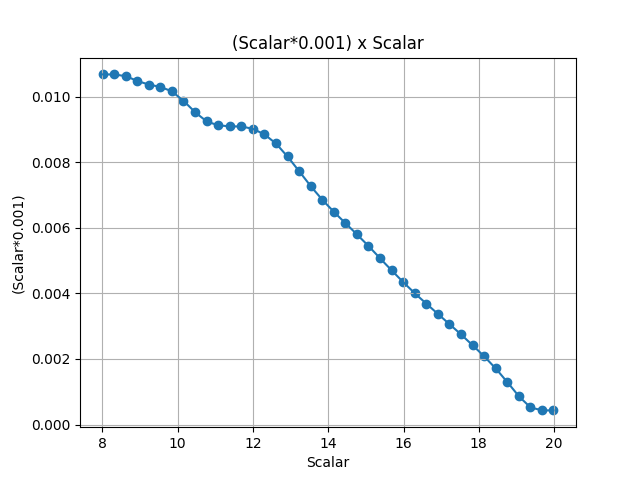

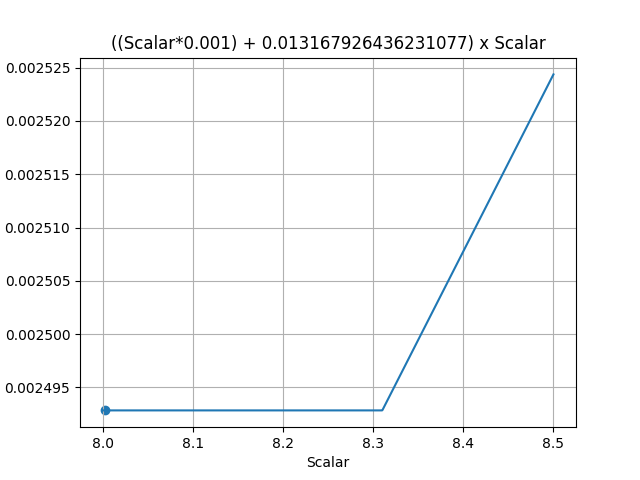

In [18]:
LOX_Volume_Liters = Function("../../data/SEBLM/test124_Lox_Volume.csv",extrapolation="zero")
LOX_Volume = LOX_Volume_Liters * 0.001
LOX_Volume.setDiscrete(8.003, 19.984, 40,interpolation="linear")
LOX_Volume.plot(forceData=True)
LOX_tank_ullage = 0.013167926436231077 - LOX_Volume
LOX_tank_ullage.plot(8,8.5,forceData=True)

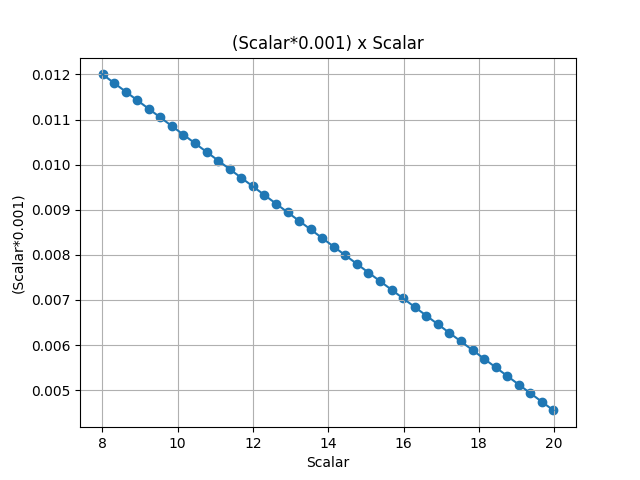

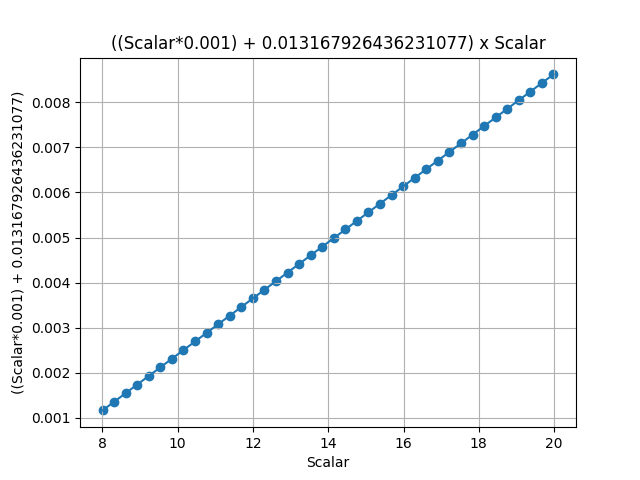

In [19]:
Propane_Volume_Liters = Function("../../data/SEBLM/test124_Propane_Volume.csv")
Propane_Volume = Propane_Volume_Liters * 0.001 # m3
Propane_Volume.setDiscrete(8.003, 19.984, 40,"linear")
Propane_Volume.plot(forceData=True)
Propane_tank_ullage = 0.013167926436231077 - Propane_Volume
Propane_tank_ullage.plot(forceData=True)

# Fluids

In [20]:
LOX = Fluid("LOX", 1024, 1)
Propane = Fluid("Propane", 566, 1)
LOXTankPressurizingGas = Fluid("N2", 31.3/28, 1) # 450 PSI
PropaneTankPressurizingGas = Fluid("N2", 313*300/4500/28, 1) # 300 PSI
PressurizingGas = Fluid("N2", 313/28, 1)# 4500 PSI

# LOX Tank

In [21]:
LOX_tank_geometry = CylindricalTank(0.0744,0.658,spherical_caps=True)
LOX_tank = UllageBasedTank(
    name="LOX Tank",
    geometry=LOX_tank_geometry,
    gas=LOXTankPressurizingGas,
    liquid=LOX,
    ullage=LOX_tank_ullage,
)

In [22]:
LOX_tank.allInfo()

AttributeError: 'UllageBasedTank' object has no attribute 'allInfo'

# Propane Tank

In [23]:
Propane_tank_geometry = CylindricalTank(0.0744,0.658,spherical_caps=True)
Propane_tank = UllageBasedTank(
    name="Propane Tank",
    geometry=Propane_tank_geometry,
    gas=PropaneTankPressurizingGas,
    liquid=Propane,
    ullage=Propane_tank_ullage,
)

In [24]:
Propane_tank.allInfo()

# Pressure Tank

In [25]:
Pressure_tank_geometry = CylindricalTank(0.135/2,0.846,spherical_caps=True)
Pressure_tank = MassBasedTank(
    name="Pressure Tank",
    geometry=Pressure_tank_geometry,
    liquid_mass=0,
    gas_mass="../../data/SEBLM/pressurantMassFiltered.csv",
    gas=PressurizingGas,
    liquid=PressurizingGas,
)


In [26]:
Pressure_tank.geometry.total_volume

0.013397806864805292

In [27]:
Pressure_tank.allInfo()

AttributeError: 'MassBasedTank' object has no attribute 'allInfo'

# Liquid Motor

In [29]:
SEBLM = LiquidMotor(
    thrustSource="../../data/SEBLM/test124_Thrust_Curve.csv",
    burn_time=20.0,
    nozzleRadius=0.069/2,
    nozzlePosition=-1.364,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)

SEBLM.addTank(Propane_tank, position=-1.048)
SEBLM.addTank(LOX_tank, position=0.711)
SEBLM.addTank(Pressure_tank, position=2.007)

Nozzle Details
Nozzle Radius: 0.0345 m

Motor Details
Total Burning Time: 20.0 s
Total Propellant Mass: 19.852 kg
Average Propellant Exhaust Velocity: 1046.101 m/s
Average Thrust: 1238.931 N
Maximum Thrust: 2428.4243134124745 N at 17.666 s after ignition.
Total Impulse: 24778.624 Ns

Plots


c:\mateus\github\rocketpy\rocketpy\Function.py:2465: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  ans, _ = integrate.quad(self, a, b, epsabs=0.001, limit=10000)


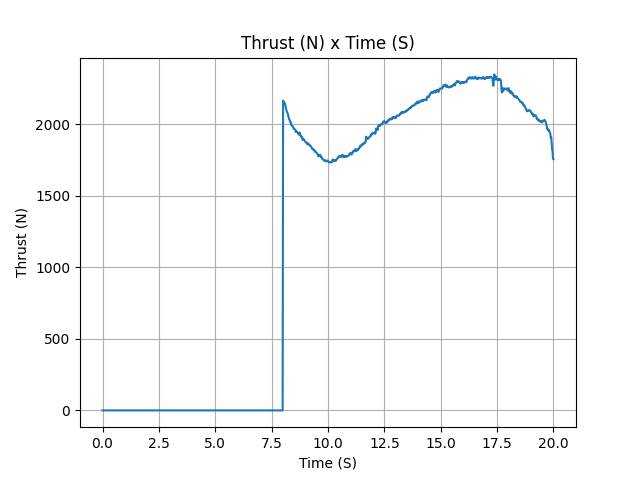

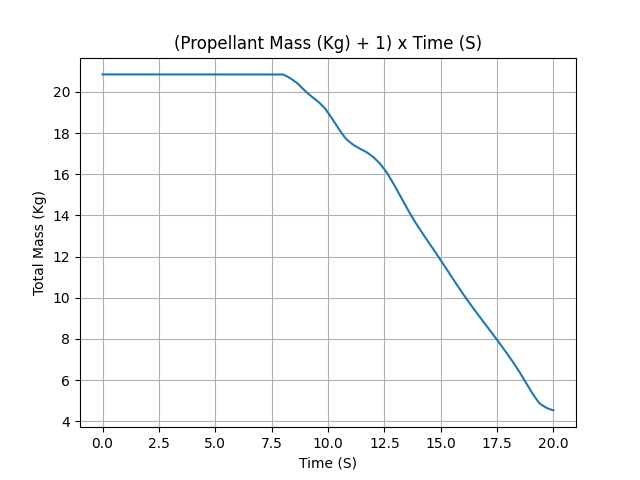

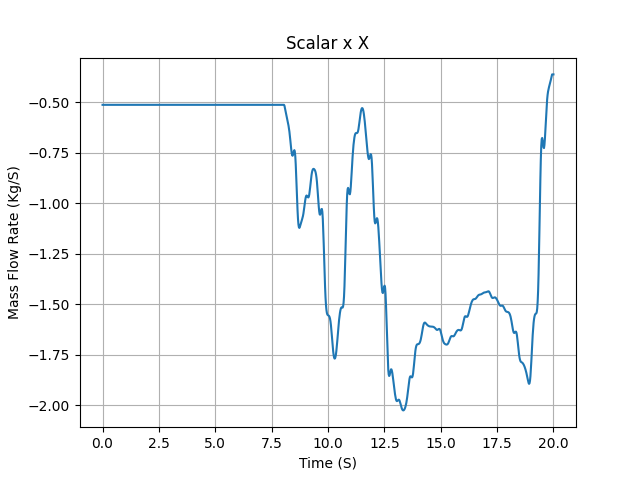

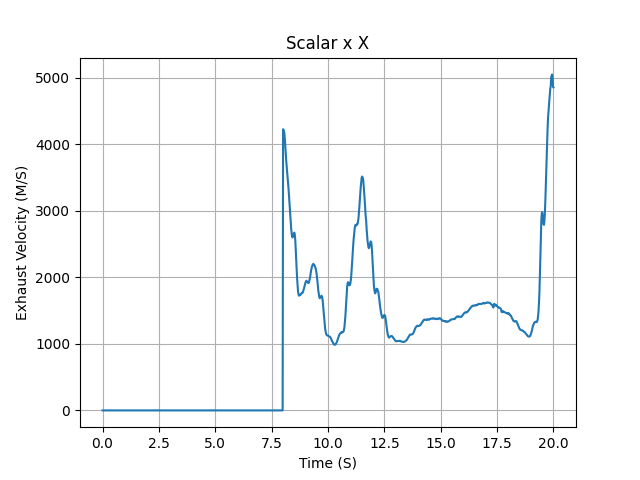

AttributeError: 'Function' object has no attribute 'yArray'

In [30]:
SEBLM.allInfo()

In [ ]:
SEBLM.mass.setDiscrete(8, 20, 50)
SEBLM.massDot.setDiscrete(8, 20, 50)
SEBLM.centerOfMass.setDiscrete(8, 20, 50)
SEBLM.Ixx.setDiscrete(8, 20, 50)
SEBLM.Iyy.setDiscrete(8, 20, 50)

In [ ]:
print(SEBLM.burnOutTime)
print(SEBLM._csys)
print(SEBLM.nozzlePosition)
SEBLM.mass.plot(8, 20)
SEBLM.massDot.plot(8, 20)
SEBLM.thrust.plot(8, 20)
SEBLM.centerOfMass.plot(8, 20)
SEBLM.Ixx.plot(8, 20)
SEBLM.Iyy.plot(8, 20)
SEBLM.Izz.plot(8, 20)
SEBLM.Ixy.plot(8, 20)
SEBLM.Ixz.plot(8, 20)
SEBLM.Iyz.plot(8, 20)

# Rocket Definition

In [32]:
from rocketpy import Rocket

SEBRocket = Rocket(
    radius=0.098,
    mass=63.4,
    inertia=(25,25,1),
    powerOffDrag="../../data/SEBLM/drag.csv",
    powerOnDrag="../../data/SEBLM/drag.csv",
    centerOfDryMassPosition=3.23,
    coordinateSystemOrientation="noseToTail",
)
SEBRocket.addMotor(SEBLM, position=5.75)
SEBRocket.addNose(length=0.7, kind="vonKarman", position=0)
SEBRocket.addTail(
    topRadius=0.098, bottomRadius=0.058, length=0.198, position=5.69-0.198
)

SEBRocket.addTrapezoidalFins(
    n=4,
    rootChord=0.355,
    tipChord=0.0803,
    span=0.156,
    position=5.25,
    cantAngle=0,
)

# Ignore next line
SEBRocket.setRailButtons([-1, 1])


In [ ]:
SEBRocket.allInfo()

In [ ]:
from rocketpy import Environment

env = Environment(
    railLength=18.28, latitude=35.347122986338356, longitude=-117.80893423073582
)

# env.setDate((2022,12,3,14+7,0,0)) # UTC
# env.setAtmosphericModel(type="Forecast", file="GFS")

In [31]:
from rocketpy import Flight

TestFlight = Flight(rocket=SEBRocket, environment=env, inclination=90, heading=23, maxTimeStep=0.1)

NameError: name 'SEBRocket' is not defined

In [ ]:
TestFlight.angleOfAttack.plot(TestFlight.outOfRailTime, 15)

In [ ]:
TestFlight.allInfo()

- Rocket radius (largest radius)
- Rocket dry mass (includes everything except propellant)
- Rocket inertia tensor (I, Z)
- Drag curves (power on, power off)
- Nozzle position 
- NoseCone length, kind (von Karman) and position (tip position)
- FinSet (n=3, rootChord, tipChord, span, position (tip of root chord), cantAngle)
- Boattail top radius, bottom radius, length, position (top radius position)